<a href="https://colab.research.google.com/github/roysuga/Weather_dashboard_Frontend_Project/blob/main/Fake_and_Real_News_Visualization_(6CSE03).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Phase 1

**Basic Analysis and representation of data**

1. Combining the datasets and labelling fake and real news

In [ ]:
import pandas as pd

# Load the fake and real news datasets
fake_df = pd.read_csv("/content/drive/MyDrive/DHV/Fake.csv")
true_df = pd.read_csv("/content/drive/MyDrive/DHV/True.csv")

# Assign labels: 0 for Fake, 1 for Real
fake_df["label"] = 0
true_df["label"] = 1

# Combine the datasets
df = pd.concat([fake_df, true_df], ignore_index=True)

# Shuffle the dataset
df = df.sample(frac=1, random_state=42).reset_index(drop=True)

# Show basic info
print("Dataset shape:", df.shape)
print("Columns:", df.columns.tolist())
print(df["label"].value_counts())


Dataset shape: (44898, 5)
Columns: ['title', 'text', 'subject', 'date', 'label']
label
0    23481
1    21417
Name: count, dtype: int64


2. Representing Fake and Real data in terms of real news articles and fake news articles

Inference:

The dataset is relatively balanced, with slightly more fake news articles (23,481) than real ones (21,417). This balance is important for unbiased model training.

<ipython-input-3-d9524e0165ab>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="label", data=df, palette="Set2")


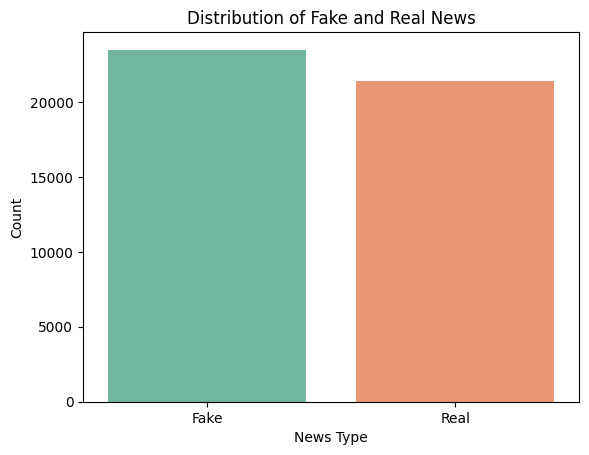

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(x="label", data=df, palette="Set2")
plt.xticks([0, 1], ['Fake', 'Real'])
plt.title("Distribution of Fake and Real News")
plt.xlabel("News Type")
plt.ylabel("Count")
plt.show()


3. Word count of real and fake news

Inference:

Fake news articles tend to have a wider range of word counts, but generally real news articles have slightly longer word counts, showing a tendency for real articles to be more detailed.

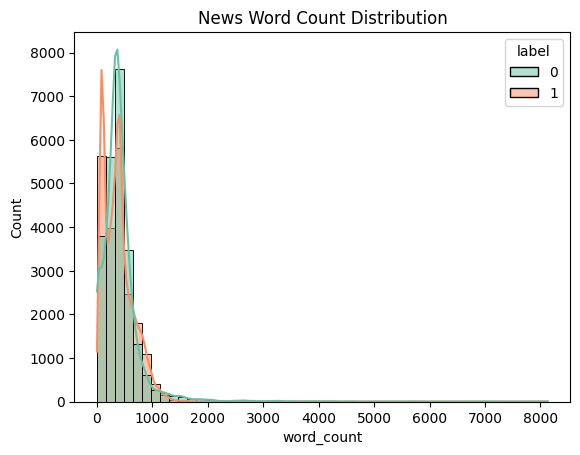

In [ ]:
# Add a word count column
df["word_count"] = df["text"].str.split().str.len()

# Plot
sns.histplot(df, x="word_count", hue="label", bins=50, kde=True, palette="Set2")
plt.title("News Word Count Distribution")
plt.show()


4. Visualizing the distribution of article text lengths to compare fake and real news

Inference:

Real news articles generally have longer text lengths compared to fake news, suggesting that real articles are more comprehensive and detailed.

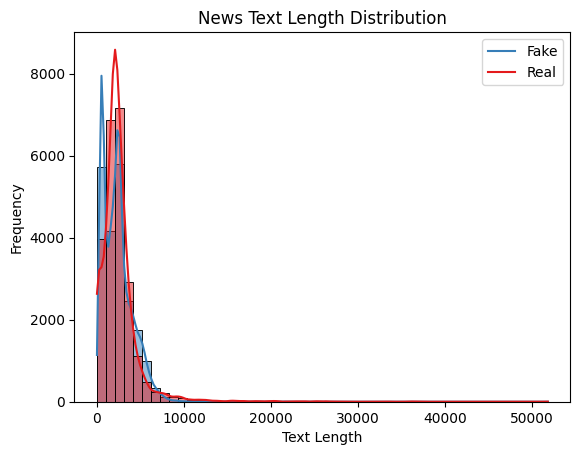

In [ ]:
df["text_length"] = df["text"].apply(len)

sns.histplot(data=df, x="text_length", hue="label", bins=50, kde=True, palette="Set1")
plt.title("News Text Length Distribution")
plt.xlabel("Text Length")
plt.ylabel("Frequency")
plt.legend(["Fake", "Real"])
plt.show()


5. Most frequent words in both the Datasets

Inference:

In fake news, words like "trump", "people", "president", "donald", and "obama" are frequent, suggesting a political bias.
In real news, words like "said", "u.s.", "president", and "state" dominate, indicating a more formal reporting style.

In [ ]:
import pandas as pd
from collections import Counter
from wordcloud import STOPWORDS


fake_text = " ".join(fake_df["text"]).lower()
real_text = " ".join(true_df["text"]).lower()


stopwords = set(STOPWORDS)

fake_words = [word for word in fake_text.split() if word not in stopwords and len(word) > 2]
real_words = [word for word in real_text.split() if word not in stopwords and len(word) > 2]

fake_common = Counter(fake_words).most_common(10)
real_common = Counter(real_words).most_common(10)

word_freq_df = pd.DataFrame({
    "Fake News Words": [word for word, _ in fake_common],
    "Fake Frequency": [count for _, count in fake_common],
    "Real News Words": [word for word, _ in real_common],
    "Real Frequency": [count for _, count in real_common]
})

print(word_freq_df)


  Fake News Words  Fake Frequency Real News Words  Real Frequency
0           trump           65511            said           72035
1            will           23730            u.s.           38276
2          people           22359           trump           36485
3       president           22080            will           24921
4             one           21561       president           23399
5            said           21221           said.           21583
6          donald           16800       (reuters)           21239
7           obama           16043             new           16578
8         clinton           15614           state           15608
9             new           13941          united           15521


6. Correlation between numeric features and the label

Inference:

There is a slight positive correlation between text length/word count and the label, implying real news articles are a bit longer and have a higher word count than fake ones.

Correlation with Label:
label          1.000000
text_length   -0.037747
word_count    -0.053405
Name: label, dtype: float64


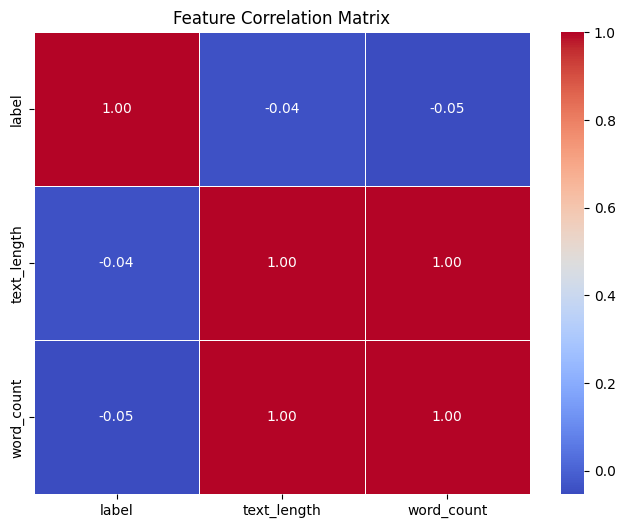

In [ ]:
df["text_length"] = df["text"].apply(len)

# Add a column for word count
df["word_count"] = df["text"].apply(lambda x: len(str(x).split()))

# Filter only numeric columns for correlation analysis
numeric_df = df.select_dtypes(include=['number'])

# Compute the correlation matrix
correlation_matrix = numeric_df.corr()

# Print correlation of all numeric features with 'label'
print("Correlation with Label:")
print(correlation_matrix['label'].sort_values(ascending=False))

# Optional: Visualize the correlation matrix
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Feature Correlation Matrix")
plt.show()

# Phase-2

**Traning the a model using datasets and representation in confusion matrix**

In [ ]:
import pandas as pd

# Load the fake and real news datasets
fake_df = pd.read_csv("/content/drive/MyDrive/DHV/Fake.csv")
true_df = pd.read_csv("/content/drive/MyDrive/DHV/True.csv")

# Assign labels: 0 for Fake, 1 for Real
fake_df["label"] = 0
true_df["label"] = 1

# Combine and shuffle the dataset
df = pd.concat([fake_df, true_df], ignore_index=True)
df = df.sample(frac=1, random_state=42).reset_index(drop=True)


In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Convert text data into TF-IDF features
vectorizer = TfidfVectorizer(stop_words='english', max_df=0.7)
X = vectorizer.fit_transform(df['text'])
y = df['label']


In [ ]:
from sklearn.model_selection import train_test_split

# Split the data while preserving class distribution
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)


In [ ]:
from sklearn.linear_model import PassiveAggressiveClassifier

# Initialize and train the model
pac = PassiveAggressiveClassifier(max_iter=50)
pac.fit(X_train, y_train)


PassiveAggressiveClassifier(max_iter=50)

In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Predict and evaluate
y_pred = pac.predict(X_test)

print(f"Accuracy: {accuracy_score(y_test, y_pred) * 100:.2f}%")
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Accuracy: 99.31%

Confusion Matrix:
 [[4662   34]
 [  28 4256]]

Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.99      0.99      4696
           1       0.99      0.99      0.99      4284

    accuracy                           0.99      8980
   macro avg       0.99      0.99      0.99      8980
weighted avg       0.99      0.99      0.99      8980



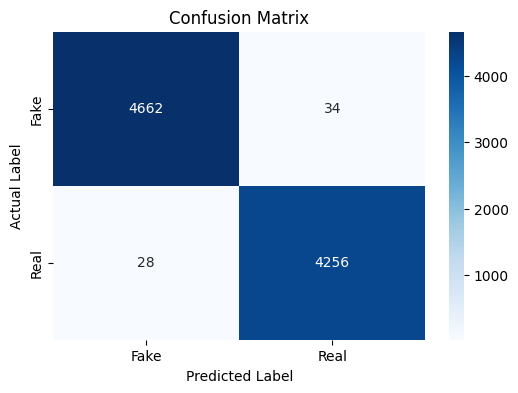

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

conf_mat = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(6, 4))
sns.heatmap(conf_mat, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Fake', 'Real'], yticklabels=['Fake', 'Real'])
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("Actual Label")
plt.show()
